# **Аналіз продажів в італійському бістро за 2024 рік.**


Цей набір даних містить дані про продажі в італійському бістро, надаючи детальну інформацію про ефективність меню, тенденції доходів і вподобання клієнтів протягом року (2024). Набір даних відображає реальну роботи ресторану та дозволяє аналізувати сезонні тенденції, періоди пікових продажів і поведінку клієнтів. Мета цього аналізу - покращення стратегії продажів, враховуючи наведені вище фактори.


Профіль колонок набору даних:
*   Date - дата замовлення;
*   Time - час замовлення;
*   Menu Item - пункт меню, назва страви;
*   Category - категорія страви:
    - Appetizer - закуски,
    - Main Course - основні страви,
    - Dessert - десерти;
*   Quantity - кількість страв в замовленні;
*   Price (per item) - вартість страви;
*   Revenue - дохід від замовлення;
*   Payment Method - спосіб оплати:
    - Credit Card - кредитна картка,
    - Cash - готівка,
    - Mobile Payment - мобільний платіж;
*   Customer Type - тип клієнтів:
    - Dine-In - обіди в закладі,
    - Takeaway - на винос,
    - Delivery - доставка.


Я бачимо набір даних включає такі ключові змінні, як пункти меню, категорії (закуски, основні страви, десерти), обсяги продажів, ціни, дохід, способи оплати (кредитна картка, готівка, мобільний платіж) і типи клієнтів (обіди, винос, доставка), що дозволять виконати аналіз діяльності бістро, виявити можливості для розвитку.

Датасет взято за посиланням: https://www.kaggle.com/datasets/divyanshisen/italian-bistro-sales-data-a-year-in-numbers

Формат даних xlsx.






# Проаналізуємо наявний датасет та зробимо висновки спираючись на отриману інформацію


In [ ]:
#імпортуємо бібліотеки для виконання аналізу
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

 Завантажуємо дані з файлу large_italian_restaurant_sales.xlsx у pandas.DataFrame df.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving large_italian_restaurant_sales.xlsx to large_italian_restaurant_sales.xlsx


In [ ]:
df = pd.read_excel("large_italian_restaurant_sales.xlsx")
df.head()

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type
0,2024-11-23,03:48 AM,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In
1,2024-03-12,03:29 AM,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway
2,2024-01-17,01:01 AM,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery
3,2024-11-04,12:54 AM,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery
4,2024-12-25,06:36 PM,Gelato,Dessert,2,4.5,9.0,Cash,Delivery


Виведемо типи даних в наборі даних

In [ ]:
df.dtypes

,0
Date,object
Time,object
Menu Item,object
Category,object
Quantity,int64
Price (per item),float64
Revenue,float64
Payment Method,object
Customer Type,object


Виведемо розмір набору даних

In [ ]:
df.memory_usage()

,0
Index,132
Date,80000
Time,80000
Menu Item,80000
Category,80000
Quantity,80000
Price (per item),80000
Revenue,80000
Payment Method,80000
Customer Type,80000


In [ ]:
total_bytes = df.memory_usage().sum()
total_megabytes = total_bytes / (1024 * 1024)
total_megabytes

np.float64(0.6867713928222656)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              10000 non-null  object 
 1   Time              10000 non-null  object 
 2   Menu Item         10000 non-null  object 
 3   Category          10000 non-null  object 
 4   Quantity          10000 non-null  int64  
 5   Price (per item)  10000 non-null  float64
 6   Revenue           10000 non-null  float64
 7   Payment Method    10000 non-null  object 
 8   Customer Type     10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB


У нашому наборі даних всі значення непорожні (10000 non-null), отже, пропусків у даних немає.

Виведемо зведену статистику для всіх числових колонок у датафреймі

In [ ]:
# Виведемо зведену статистику для всіх числових колонок у датафреймі
df.describe()

,Quantity,Price (per item),Revenue
count,10000.000000,10000.000000,10000.000000
mean,2.978000,8.324850,24.773050
std,1.420041,2.962858,15.344064
min,1.000000,4.500000,4.500000
25%,2.000000,5.500000,13.000000
50%,3.000000,7.000000,22.000000
75%,4.000000,11.500000,34.500000
max,5.000000,13.000000,65.000000


Спираючись на отримані дані можна сказати:
- Quantity - кількість страв в замовленні в середньому становить близько 3 (2,978), максимальне замовлення 5 страв;
- Price (per item) - вартість страви коливається від 4,5 до 13, середня вартість 8,32;
- Revenue - дохід від замовлення переважно становить від 13 до 34,5, але іноді зростає до 65.

1. Який загальний дохід бістро за рік і як він змінювався щомісяця?

In [ ]:
# знайдемо річний дохід бістро
year_revenue = df['Revenue'].sum()
print ('Загальний дохід бістро за 2024 рік становив:', year_revenue)

Загальний дохід бістро за 2024 рік становив: 247730.5


In [ ]:
# визначимо дохід в розрізі місяців
df['Date'] = pd.to_datetime(df['Date'])  # Перетворюємо в колонку Date в datetime

month_revenue = df.groupby(df['Date'].dt.strftime('%B'))['Revenue'].sum()  # для зручності визначаємо назви місяців, а не їх числове значення

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']  # Впорядковуємо місяці в правильному порядку

month_revenue = month_revenue.reindex(month_order)

print('Дохід бістро за 2024 рік у розрізі місяців:', month_revenue)

Дохід бістро за 2024 рік у розрізі місяців: Date
January      19871.5
February     19113.0
March        21217.5
April        20521.5
May          20614.5
June         19110.5
July         21410.5
August       22827.5
September    20409.5
October      21448.5
November     20804.0
December     20382.0
Name: Revenue, dtype: float64


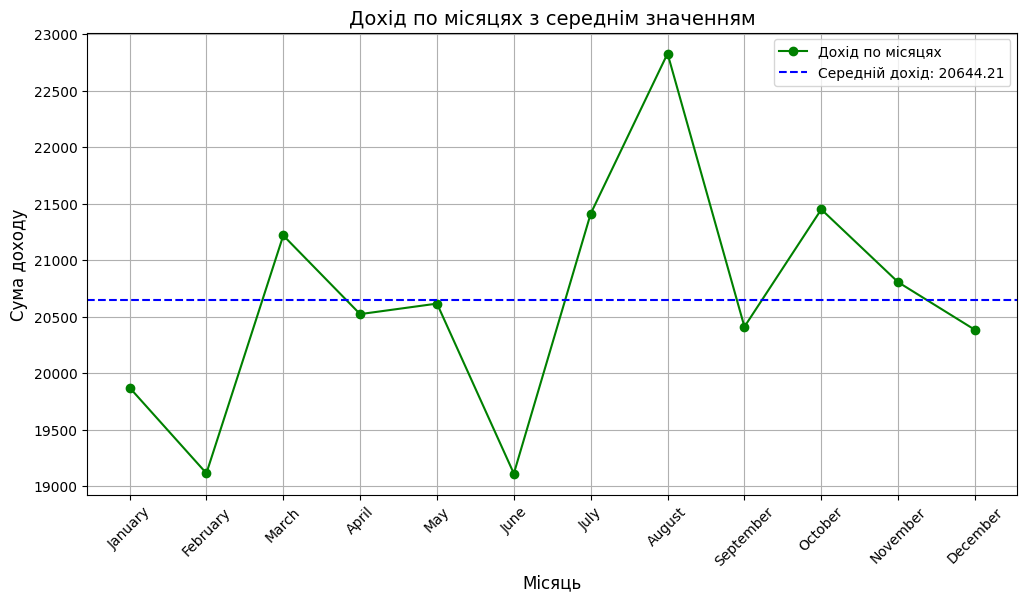

In [ ]:
# Обчислюємо середній місячний дохід, хотілось би бачити на графіку середнє значення доходу за аналітичний період
average_revenue = month_revenue.mean()

# Побудова лінійного графіка
plt.figure(figsize=(12, 6))
plt.plot(month_revenue.index, month_revenue.values, marker='o', linestyle='-', color='g', label="Дохід по місяцях")

# Додаємо середню лінію
plt.axhline(y=average_revenue, color='b', linestyle='--', label=f"Середній дохід: {average_revenue:.2f}")

# Додаємо заголовки
plt.title("Дохід по місяцях з середнім значенням", fontsize=14)
plt.xlabel("Місяць", fontsize=12)
plt.ylabel("Сума доходу", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

На основі графіку можемо зробити висновок про наступне:
- найвищий дохід було отримано в серпні місяці (22827.5);
- найнижчий показник доходу спостерігається в місяцях лютому (19113.0) та червні (19110.5);
- у період липня-серпня відбувається значне зростання доходу до його піку в серпні;
- рівень доходу за результатами роботи в березні, липні, серпні, жовтні та листопаді вище середнього значення за рік

2. Які страви є популярнішими в залежності від сезону?

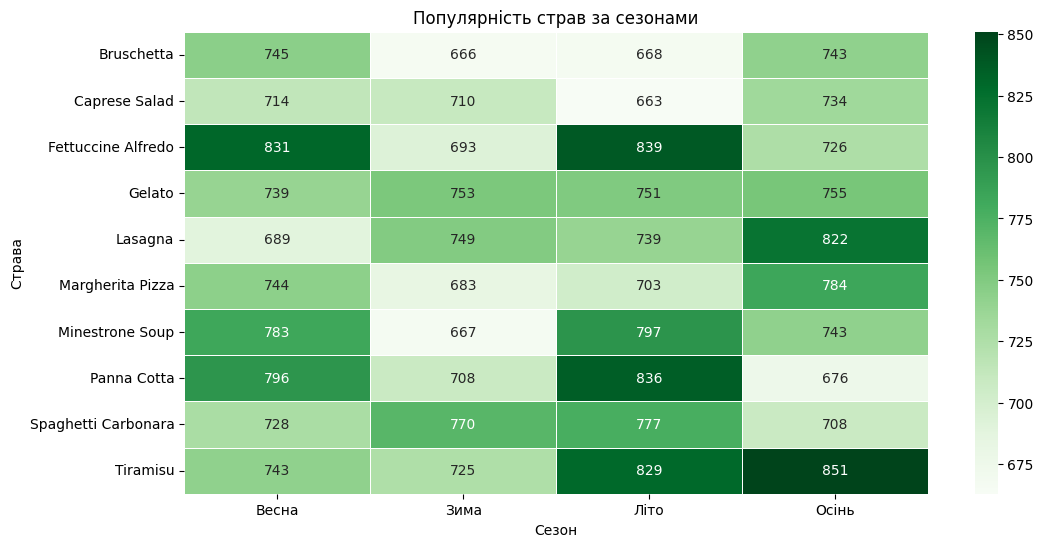

In [ ]:
# використаємо раніше перетворену колону колонку Date в datetime

# за допомогою функції визначемо сезон за місяцем
def get_season(month):
    if month in [12, 1, 2]:
        return "Зима"
    elif month in [3, 4, 5]:
        return "Весна"
    elif month in [6, 7, 8]:
        return "Літо"
    else:
        return "Осінь"

# додамо  стовпчик "Сезон"
df['Season'] = df['Date'].dt.month.apply(get_season)

# Групуємо за стравами та сезонами
seasonal_sales = df.groupby(['Menu Item', 'Season'])['Quantity'].sum().unstack()

# Візуалізація: Heatmap популярності страв за сезонами
plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_sales, cmap="Greens", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Популярність страв за сезонами")
plt.ylabel("Страва")
plt.xlabel("Сезон")
plt.show()

По сезонам можна сказати про наступний розподіл найпопулярніших та менш попудярних страв по кількості замовлень:
- найпопулярніші: зима - Spaghetti Carbonara, весна - Fettuccine Alfredo, літо - Fettuccine Alfredo і можна зазначити також і страву Panna Cotta, осінь - Tiramisu;
- найменш популярні страви: зима - Bruschetta i Minestrone Soup, весна - Lasagna, літо - Caprese Calad, осінь - Panna Cotta.

3. Яка категорія страв є найпопулярнішою та приносить найбільший дохід?

In [ ]:
# визначимо розподіл категорій страв за кількістю замовлень та доходу
category_stats = df.groupby('Category').agg(
    count=('Category', 'count'),
    total_revenue=('Revenue', 'sum')
)
print(category_stats)

             count  total_revenue
Category                         
Appetizer     2902        57608.0
Dessert       3063        50541.0
Main Course   4035       139581.5


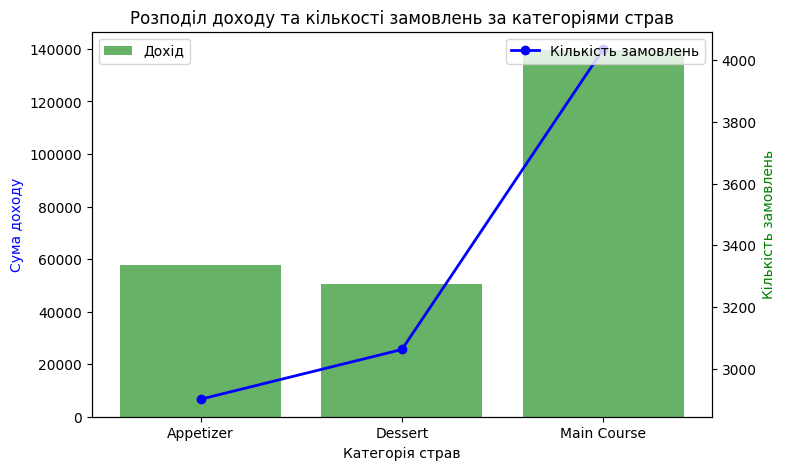

In [ ]:
# побудуємо графік для більшої наочності отриманих даних
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.bar(category_stats.index, category_stats['total_revenue'], color='g', alpha=0.6, label='Дохід')
ax1.set_xlabel("Категорія страв")
ax1.set_ylabel("Сума доходу", color='b')

# Додаємо другу вісь для кількості замовлень
ax2 = ax1.twinx()
ax2.plot(category_stats.index, category_stats['count'], color='b', marker='o', linestyle='-', linewidth=2, label='Кількість замовлень')
ax2.set_ylabel("Кількість замовлень", color='g')

# Додаємо заголовок
plt.title("Розподіл доходу та кількості замовлень за категоріями страв")

# Додаємо легенди
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Як бачимо найбільше замовляли головні страви, за ними отримано найбільший дохід.
Десерти за кількістю замовлень  на 2-му місці, але дохід від їх продажі найменший.
Закуски за кількістю замовлень на останньому 3-му місці, дохід від їх продажу на 2-му місці і є більшим за дохід від продажу десертів.

4. Яка страва приносить найбільший дохід і чи є вона найпопулярнішою серед страв меню?

In [ ]:
# визначимо дохід по кожній страві меню
menu_item_revenue = df.groupby('Menu Item').agg(
     count=('Menu Item', 'count'),
      total_revenue=('Revenue', 'sum')
).sort_values('total_revenue', ascending=False)
print(menu_item_revenue)

                     count  total_revenue
Menu Item                                
Fettuccine Alfredo    1036        40157.0
Spaghetti Carbonara   1009        35796.0
Lasagna               1012        34488.5
Margherita Pizza       978        29140.0
Caprese Salad          945        22568.0
Minestrone Soup        999        20930.0
Tiramisu              1052        20462.0
Panna Cotta           1024        16588.0
Bruschetta             958        14110.0
Gelato                 987        13491.0


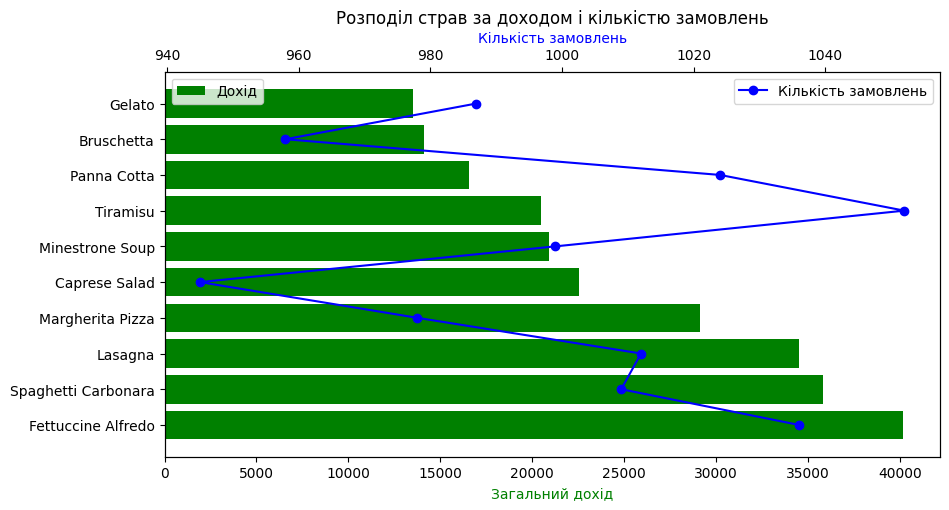

In [ ]:
# побудуємо графік для більшої наочності отриманих даних
fig, ax1 = plt.subplots(figsize=(10, 5))

# Побудова стовпчастого графіка для доходу
ax1.barh(menu_item_revenue.index, menu_item_revenue['total_revenue'], color='green', label='Дохід')
ax1.set_xlabel("Загальний дохід", color='green')

# Створюємо другу вісь для кількості замовлень
ax2 = ax1.twiny()
ax2.plot(menu_item_revenue['count'], menu_item_revenue.index, 'o-', color='blue', label='Кількість замовлень')
ax2.set_xlabel("Кількість замовлень", color='blue')

# Додаємо заголовок і легенду
plt.title('Розподіл страв за доходом і кількістю замовлень')
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

Як бачимо найпопулярнішою є страва Tiramisu (1052 замовлень), але найбільший дохід принесла страва Fettuccine Alfredo (дохід - 40157,0)

5. Який розроділ клієнтів за їх типом? Як розподіляються замовлення та дохід за типом клієнтів?

In [ ]:
# визначимо розподіл клієнтів за їх типом у відсотках до загальної кількості
customer_type_percent = df['Customer Type'].value_counts(normalize=True) * 100
print(customer_type_percent)

Customer Type
Takeaway    33.69
Dine-In     33.53
Delivery    32.78
Name: proportion, dtype: float64


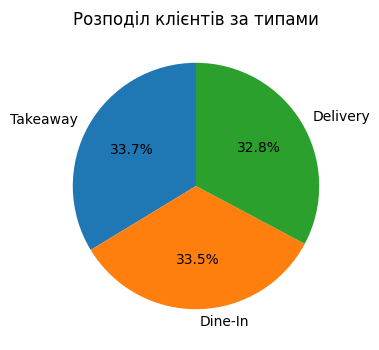

In [ ]:
# побудуємо кругову діаграму для більш наглядного відображення отриманої інформації
plt.figure(figsize=(4, 4))  # Розмір фігури
plt.pie(customer_type_percent, labels=customer_type_percent.index, autopct='%1.1f%%', startangle=90)
plt.title('Розподіл клієнтів за типами')
plt.show()

Згідно отриманих даних можна сказати, що частки типів клієнтів розподілені без значних видривів по кожному типу.  

In [ ]:
# визначимо розподіл типів клієнтів за кількістю замовлень та величиною доходу
customer_type  = df.groupby('Customer Type').agg(
    count=('Category', 'count'),
    total_revenue=('Revenue', 'sum')
)
print(customer_type)

               count  total_revenue
Customer Type                      
Delivery        3278        81536.0
Dine-In         3353        83433.5
Takeaway        3369        82761.0


Отримані кількісні  значення по різних типам клієнтів суттєво не відрізняються між собою.

6. Які способи оплати найбільше використовуються клієнтами?

In [ ]:
payment_method = df['Payment Method'].value_counts()
print(payment_method)

Payment Method
Cash              3374
Mobile Payment    3339
Credit Card       3287
Name: count, dtype: int64


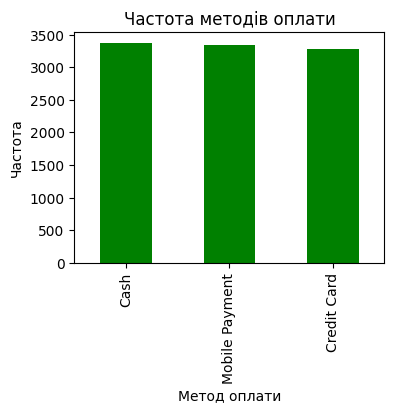

In [ ]:
# побудуємо стовпчастий графік для більш наглядного відображення отриманої інформації
plt.figure(figsize=(4, 3))
payment_method.plot(kind='bar', color='green')
plt.title('Частота методів оплати')
plt.xlabel('Метод оплати')
plt.ylabel('Частота')
plt.show()

На графіку наочно бачимо відсутність великої різниці між способами оплат за замовлення, великої розбіжності у даних немає.

7. Чи є зв'язок між типом клієнта та способом оплати?

Щоб перевірити, чи є зв'язок між типом клієнта та способом оплати, використаємо статистичні методи для аналізу залежності між двома категоріальними змінними.

Використаємо тест хі-квадрат для незалежності. Цей тест допомагає визначити, чи є статистично значуща залежність між двома категоріальними змінними.

In [ ]:
import scipy.stats as stats
# створимо таблиці спряженості (contingency table) між типом клієнта та методом оплати
contingency_table = pd.crosstab(df['Customer Type'], df['Payment Method'])

# проведемл тест хі-квадрат
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Інтерпретація результатів
if p_val < 0.05:
    print("Є статистично значущий зв'язок між типом клієнта та способом оплати.")
else:
    print("Немає статистично значущого зв'язку між типом клієнта та способом оплати.")

Chi2 statistic: 4.11674894879582
P-value: 0.39043611653858695
Немає статистично значущого зв'язку між типом клієнта та способом оплати.


Отже, тип клієнта та спосіб оплати не пов'язані між собою.

8.  Як розподіляються замовлення в залежності від типу клієнтів за часом доби?

In [ ]:
# конвертуємо значення часу в колонці Time у 24-годинний формат
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.hour

# перевіряємо отриманий результат
print(df[['Time', 'Hour']].head())

       Time  Hour
0  03:48 AM     3
1  03:29 AM     3
2  01:01 AM     1
3  12:54 AM     0
4  06:36 PM    18


In [ ]:
# визначимо розподіл за типами клієнтів відповідно до години доби

time_customer_distribution = df.groupby(['Hour', 'Customer Type']).agg(
    count=('Customer Type', 'count'),
    total_revenue=('Revenue', 'sum')
).reset_index()

print(time_customer_distribution)

    Hour Customer Type  count  total_revenue
0      0      Delivery    142         3712.0
1      0       Dine-In    145         3799.0
2      0      Takeaway    143         3151.0
3      1      Delivery    134         3301.5
4      1       Dine-In    145         3428.5
..   ...           ...    ...            ...
67    22       Dine-In    147         3882.0
68    22      Takeaway    155         4049.5
69    23      Delivery    165         3794.5
70    23       Dine-In    136         3398.5
71    23      Takeaway    139         3393.5

[72 rows x 4 columns]


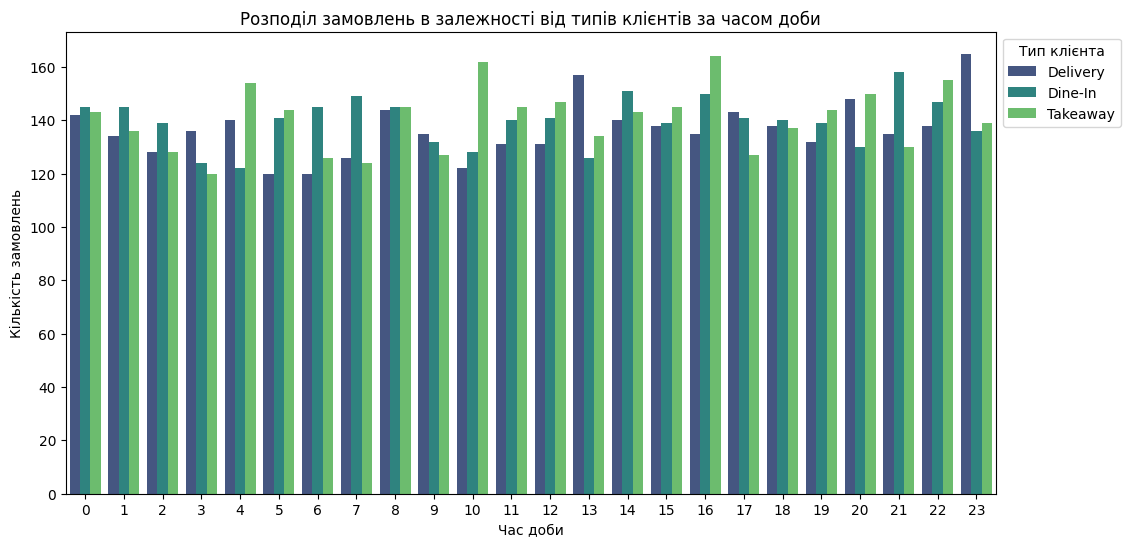

In [ ]:
# відобразимо на графіку визначений розподіл
plt.figure(figsize=(12, 6))
sns.barplot(data=time_customer_distribution, x='Hour', y='count', hue='Customer Type', palette="viridis")

plt.xlabel("Час доби")
plt.ylabel("Кількість замовлень")
plt.title("Розподіл замовлень в залежності від типів клієнтів за часом доби")
plt.legend(title="Тип клієнта", bbox_to_anchor=(1, 1))
plt.show()

Пікові значення замовлень одним типом клієнтів порівняно з іншими простежується у наступні години (періоди):
- доставка (Delivery) -  3-4 години, 13 та 23 години;
- обіди в закладі (Dine-In) - 6-7 години, 14 та 21 години;
- на винос (Takeaway) - 4-5 години, 8, 10-12, 15-16, 20, 22 години.

Також, згідно графіку, слід відмітити найбільшу кількість пікових значень коли замовлення купують на винос, такі замовлення частіше є лідерами, ніж інші.

9. Як змінювався дохід в залежності від часу доби?

In [ ]:
# визначимо розподіл кількості замовлень і доходу за часом доби
time_category_revenue = df.groupby('Hour').agg(
        total_revenue=('Revenue', 'sum'))
print(time_category_revenue)

      total_revenue
Hour               
0           10662.0
1           10220.5
2            9669.5
3            9096.5
4           10036.0
5            9617.5
6            9886.5
7            9467.5
8           10935.0
9            9897.5
10          10194.0
11          10757.0
12          10684.5
13          10466.5
14          10734.0
15          10857.5
16          11487.0
17          10468.0
18          10256.5
19           9434.0
20          10514.0
21          10595.0
22          11207.5
23          10586.5


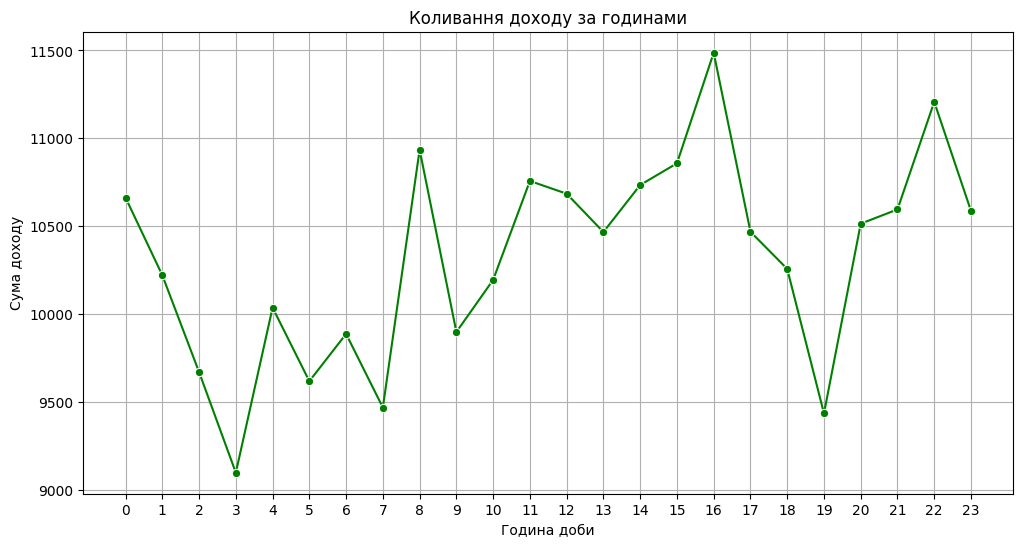

In [ ]:
# побудуємо графік для наочності аналізу
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_category_revenue, x=time_category_revenue.index, y='total_revenue', marker='o', color='green')

plt.xlabel("Година доби")
plt.ylabel("Сума доходу")
plt.title("Коливання доходу за годинами")
plt.xticks(range(0, 24))  # Відображаємо всі години
plt.grid()
plt.show()

Спираючись на графік можна сказати про наступне:
- найбільший дохід було отримано о 16 годині;
- на другому місці дохід, отриманий о 22 годині;
- найменьший дохід отримано о 3 годині.

10. Знайдемо кореляцію між кількістю замовлень та доходом.

In [ ]:
# Обчислюємо кореляцію
correlation = df['Revenue'].corr(df['Quantity'])
print(f"Кореляція між середнім чеком і кількістю замовлень: {correlation:.2f}")

Кореляція між середнім чеком і кількістю замовлень: 0.77


Аналізуючи знайдене значення, можна сказати про сильний позитивний зв’язок між доходом та кількістю замовлень. Чим більше замовлень, тим більший дохід, що є логічним для цієї сфери діяльності.

Висновки до проведеного аналізу продажів італійського бістро за 2024 рік.
1. Річний дохід склав 247730,5. Найвищим дохід був в серпні (22827,5), найнижчим в лютому (19113,0) та червні (19110,5).  
2. Найпопулярнішими стравами в залежності від сезону є:
- зима - Spaghetti Carbonara
- весна - Fettuccine Alfredo
- літо - Fettuccine Alfredo і Panna Cotta
- осінь - Tiramisu
3. Найпопулярнішою категорією страв є основні страви (найвищий рівень замовлень та доходу). Десерти займають 2-ге місце за популярність, але приносять менший дохід, ніж закуски, які є найменш популярною категорією страв.
4. Найдохіднішою є страва Fettuccine Alfredo, найпопулярнішою за кількістю замовлень є страва Tiramisu.
5. Кількість клієнтів за типом  (Dine-In, Takeaway, Delivery) суттєво не відрізняється між собою. Але все ж таки лідерами є клієнти  Takeaway.
6. Найчастіше розраховувались готівкою, найрідше кредитною картою. Але, слід зауважити, що розбіжності в показниках не великі.
7. Під час аналізу виявлено відсутність статистично значущого зв’язку між способом оплати та типом клієнта.
8. Різниця між типами клієнтів в залежності від часу доби показує, що замовлення Takeaway мають сплески у певні години, тоді як замовлення Dine-In, Delivery більш рівномірно розподілені.
9. Дохід від замовлень має пікові значення у періоди з 11 по 16 години, з 20 по 23 години.
10. Між кількістю замовлень та доходом існує сильний позитивний зв'язок – чим більше страв у замовлення, то вищий дохід.

Рекомендації для покращення роботи бістро:
- запроваджувати сезонні акції в періоди низького попиту (лютий, червень) для збільшення доходу;
- розвивати меню основних страв, оскільки вони найпопулярніші та найбільш прибуткові.
- приділити більше уваги закускам, які приносять дохід більший за десерти, але менш популярні.
- популяризувати безготівкові методи оплати для швидшого обслуговування клієнтів.
-  збільшити рекламу та промоакції вранці для стимулювання ранкових замовлень.